# Final Project

## Survival Analysis

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from lifelines import KaplanMeierFitter, CoxPHFitter, ExponentialFitter, WeibullFitter

## Dataset 1

In [4]:
df1 = pd.read_excel('Data Exp1.xlsx')

In [5]:
df1.head()

,MicroColony_ID,Treatment,OriginColony_name,Time,Event
0,a,Control,Colony 1,1440.0,1.0
1,b,Control,Colony 1,1440.0,0.0
2,c,Control,Colony 1,1440.0,0.0
3,d,Control,Colony 1,1440.0,0.0
4,e,Control,Colony 1,1440.0,0.0


In [6]:
df1.shape

(161, 5)

In [75]:
df1.isna().sum().sum()

0

In [7]:
df1.columns

Index(['MicroColony_ID', 'Treatment', 'OriginColony_name', 'Time', 'Event'], dtype='object')

<AxesSubplot:xlabel='Event', ylabel='Treatment'>

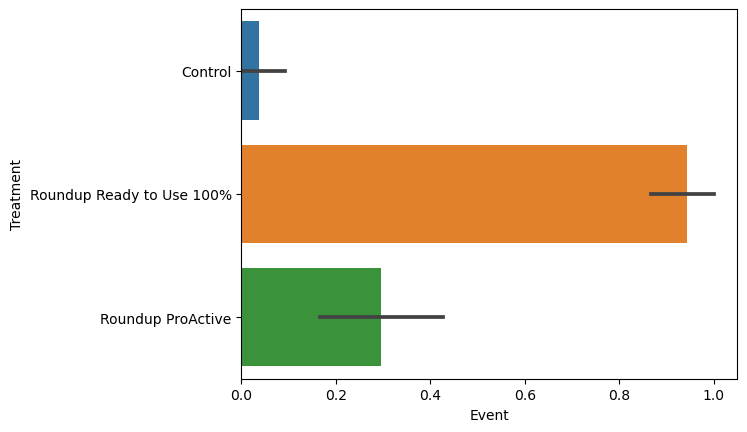

In [59]:
sns.barplot(data=df1, x='Event', y='Treatment')

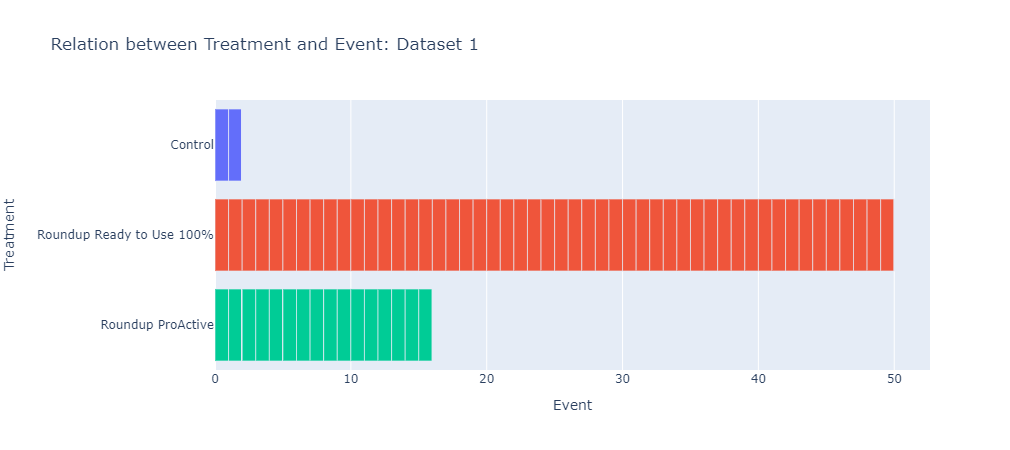

In [66]:
fig = px.bar(df1, x='Event', y='Treatment', color='Treatment' ,title='Relation between Treatment and Event: Dataset 1')
fig.update_layout(showlegend=False)

<AxesSubplot:xlabel='Event', ylabel='Time'>

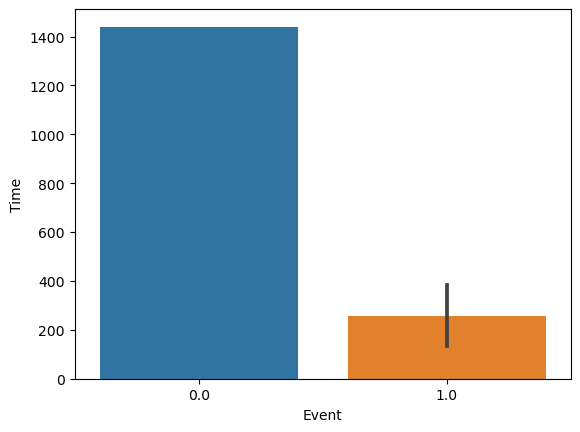

In [9]:
sns.barplot(data=df1, x='Event', y='Time')

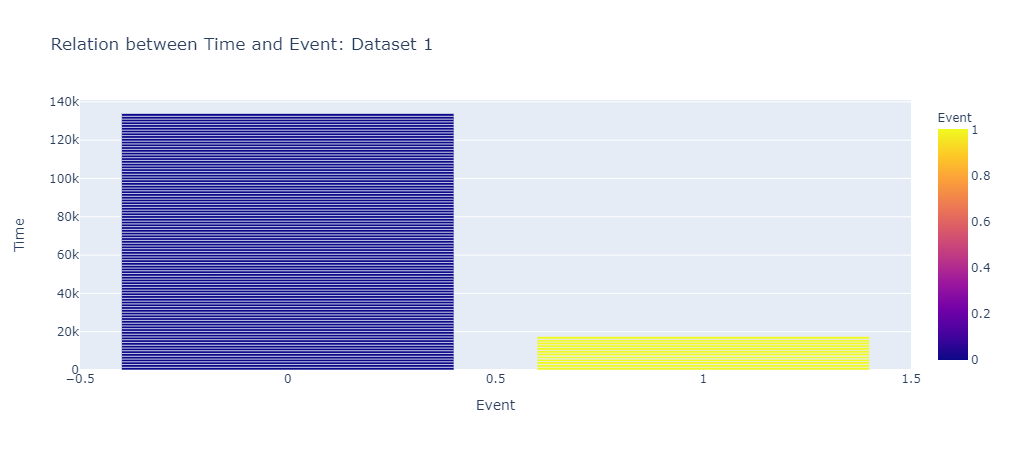

In [69]:
fig = px.bar(df1, x='Event', y='Time', color='Event' ,title='Relation between Time and Event: Dataset 1')
fig.update_layout(showlegend=False)

In [102]:
df1.Time.value_counts()

1440.0    105
0.0        38
10.0       13
20.0        4
30.0        1
Name: Time, dtype: int64

In [10]:
kmf = KaplanMeierFitter()

In [11]:
kmf.fit(df1.Time, df1.Event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 161 total observations, 93 right-censored observations>

Text(0, 0.5, 'Survival probability')

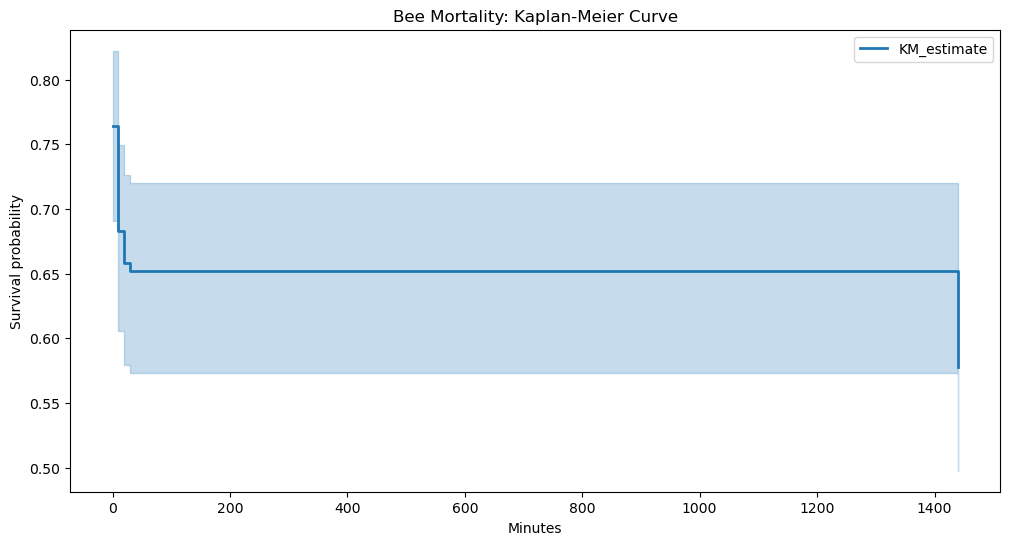

In [12]:
kmf.plot(linewidth=2, figsize=(12,6))
plt.title('Bee Mortality: Kaplan-Meier Curve')
plt.xlabel('Minutes')
plt.ylabel('Survival probability')

In [104]:
df1['Treatment'].unique()

array(['Control', 'Roundup Ready to Use 100%', 'Roundup ProActive'],
      dtype=object)

In [14]:
df1a = df1[df1.Treatment=='Roundup Ready to Use 100%']
df1b = df1[df1.Treatment=='Roundup ProActive']
df1c = df1[df1.Treatment=='Control']

Text(0, 0.5, 'Survival probability')

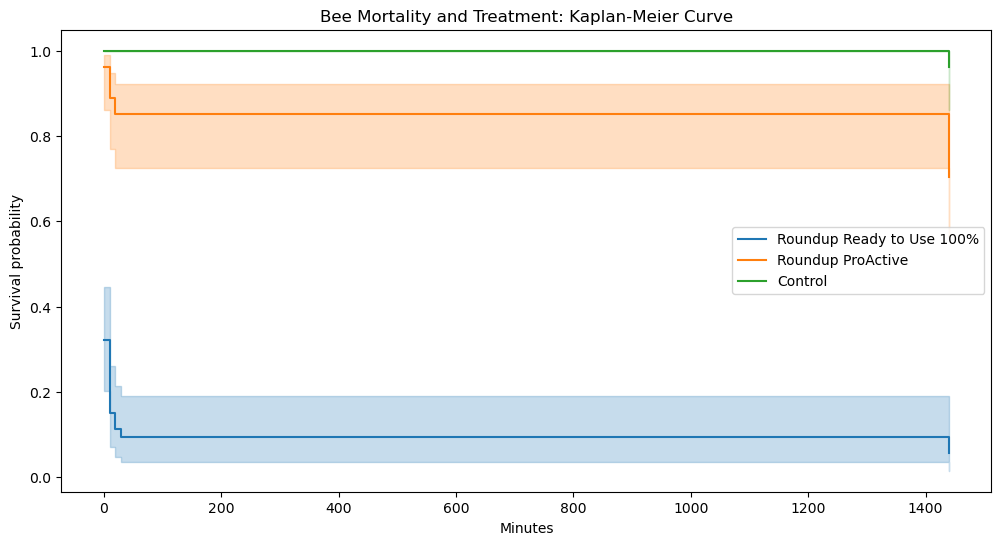

In [15]:
kmf.fit(df1a.Time, df1a.Event)
kmf.plot(label='Roundup Ready to Use 100%', figsize=(12,6))
kmf.fit(df1b.Time, df1b.Event)
kmf.plot(label='Roundup ProActive', figsize=(12,6))
kmf.fit(df1c.Time, df1c.Event)
kmf.plot(label='Control', figsize=(12,6))
plt.title('Bee Mortality and Treatment: Kaplan-Meier Curve')
plt.xlabel('Minutes')
plt.ylabel('Survival probability')

In [92]:
df_u = df1[['Treatment','Event']]
df_u.head()

,Treatment,Event
0,Control,1.0
1,Control,0.0
2,Control,0.0
3,Control,0.0
4,Control,0.0


In [93]:
df_d = pd.get_dummies(df_u, drop_first=True)
df_d.head()

,Event,Treatment_Roundup ProActive,Treatment_Roundup Ready to Use 100%
0,1.0,0,0
1,0.0,0,0
2,0.0,0,0
3,0.0,0,0
4,0.0,0,0


In [94]:
df_d['Time'] = df1.Time
df_d.head()

,Event,Treatment_Roundup ProActive,Treatment_Roundup Ready to Use 100%,Time
0,1.0,0,0,1440.0
1,0.0,0,0,1440.0
2,0.0,0,0,1440.0
3,0.0,0,0,1440.0
4,0.0,0,0,1440.0


In [105]:
df_u = df1[['Treatment','Event']]
df_d = pd.get_dummies(df_u, drop_first=True)
df_d['Time'] = df1.Time
df_d.head()

,Event,Treatment_Roundup ProActive,Treatment_Roundup Ready to Use 100%,Time
0,1.0,0,0,1440.0
1,0.0,0,0,1440.0
2,0.0,0,0,1440.0
3,0.0,0,0,1440.0
4,0.0,0,0,1440.0


In [95]:
cph = CoxPHFitter()
cph.fit(df_d, duration_col='Time', event_col='Event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 161 total observations, 93 right-censored observations>
             duration col = 'Time'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 161
number of events observed = 68
   partial log-likelihood = -262.50
         time fit was run = 2023-02-07 00:19:30 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
Treatment_Roundup ProActive           2.20       9.06       0.75             0.73             3.67                 2.08                39.42
Treatment_Roundup Ready to Use 100%   4.55      94.60       0.73             3.12             5.98                22.62               395.59

                                      cmp to    z      p   -log2(p)
covariate                                                          
Treatment_Roundup ProActive             0.00 2.94 <0.005       8.24
Treatment_Roundup Ready to Use 100%     0.00 6.23 <0.005      31.02
---
Concordance = 0.88
Partial AIC = 528.99
log-likelihood ratio test = 132.71 on 2 df
-log2(p) of ll-ratio test = 95.73

<AxesSubplot:xlabel='log(HR) (95% CI)'>

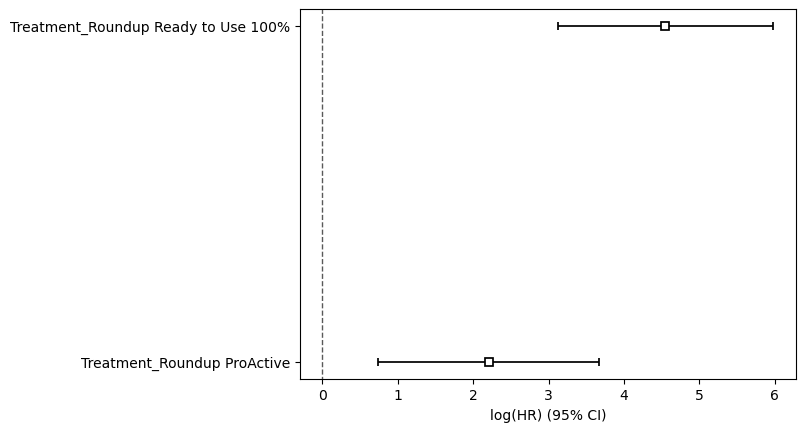

In [96]:
cph.plot()

<AxesSubplot:>

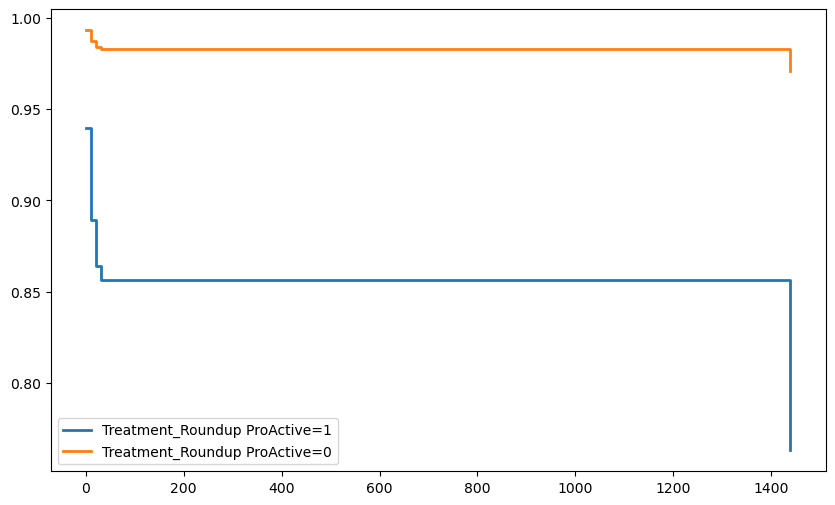

In [21]:
cph.plot_partial_effects_on_outcome('Treatment_Roundup ProActive', [1,0], plot_baseline=False, figsize=(10,6), lw=2)

<AxesSubplot:>

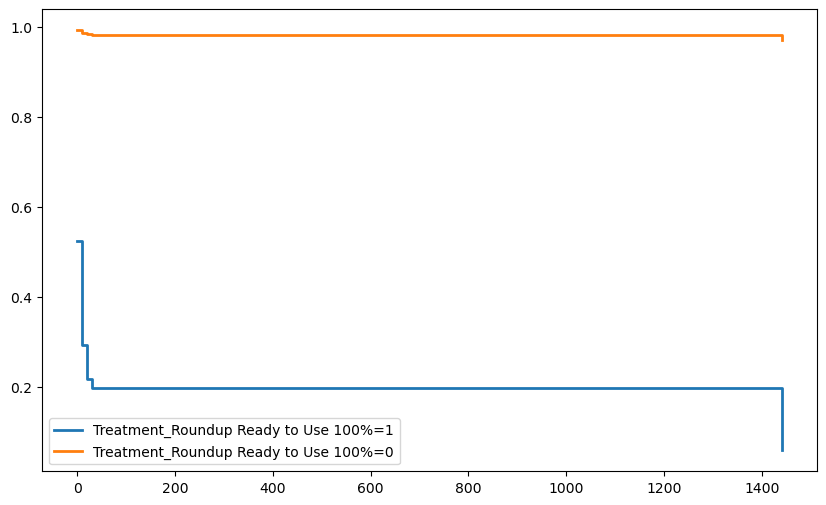

In [22]:
cph.plot_partial_effects_on_outcome('Treatment_Roundup Ready to Use 100%', [1,0], plot_baseline=False, figsize=(10,6), lw=2)

## Dataset 2

In [42]:
df4 = pd.read_excel('Data Exp4.xlsx')

In [43]:
df4.head()

,MicroColony_ID,Treatment,OriginColony_name,Time,Event
0,a,Control,Colony 3,1440.0,1.0
1,a,Control,Colony 3,1440.0,0.0
2,a,Control,Colony 3,1440.0,0.0
3,a,Control,Colony 3,1440.0,0.0
4,a,Control,Colony 3,1440.0,0.0


In [44]:
df4.shape

(107, 5)

In [77]:
df4.isna().sum().sum()

0

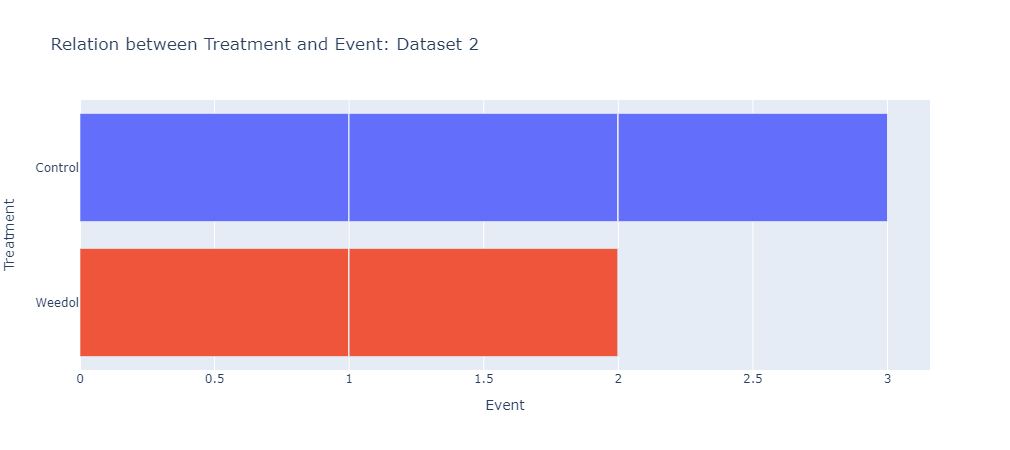

In [65]:
fig = px.bar(df4, x='Event', y='Treatment', color='Treatment' ,title='Relation between Treatment and Event: Dataset 2')
fig.update_layout(showlegend=False)

<AxesSubplot:xlabel='Event', ylabel='Treatment'>

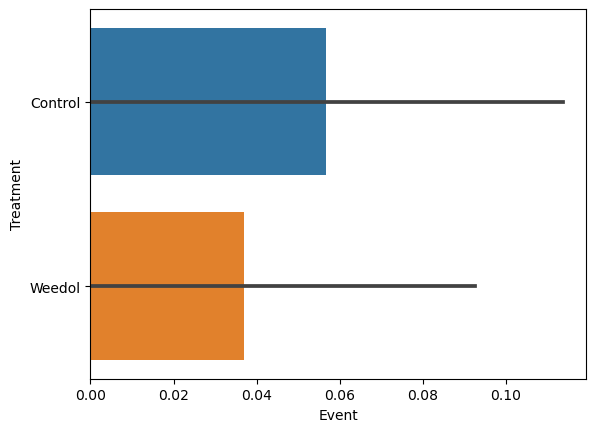

In [24]:
sns.barplot(data=df4, x='Event', y='Treatment')

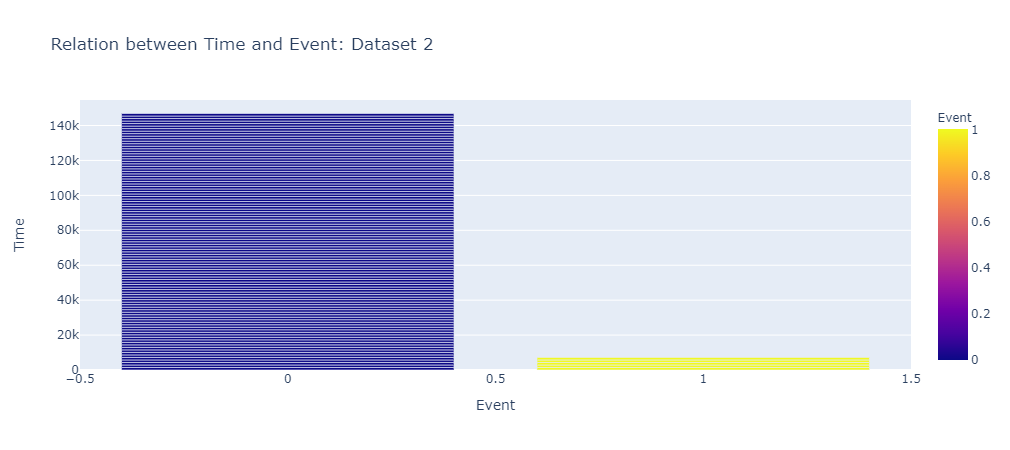

In [70]:
fig = px.bar(df4, x='Event', y='Time', color='Event' ,title='Relation between Time and Event: Dataset 2')
fig.update_layout(showlegend=False)

<AxesSubplot:xlabel='Event', ylabel='Time'>

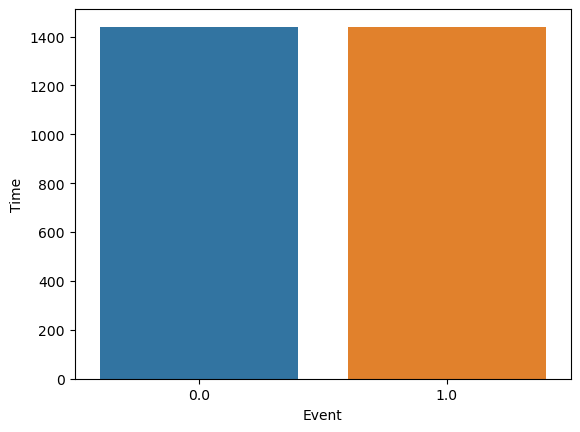

In [25]:
sns.barplot(data=df4, x='Event', y='Time')

Text(0, 0.5, 'Survival probability')

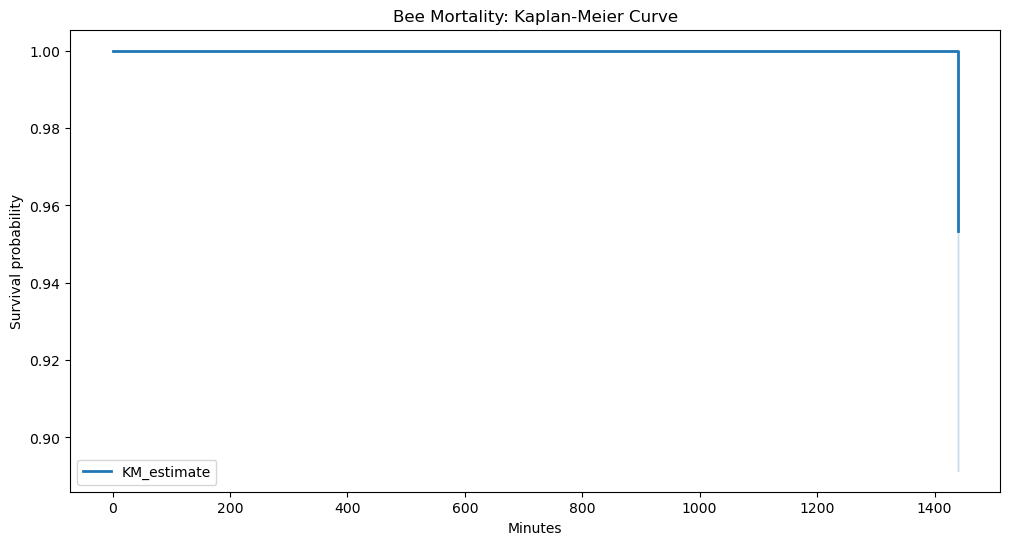

In [26]:
kmf = KaplanMeierFitter()
kmf.fit(df4.Time, df4.Event)
kmf.plot(linewidth=2, figsize=(12,6))
plt.title('Bee Mortality: Kaplan-Meier Curve')
plt.xlabel('Minutes')
plt.ylabel('Survival probability')

In [116]:
df4.Event.value_counts()

0.0    102
1.0      5
Name: Event, dtype: int64

Text(0, 0.5, 'Survival probability')

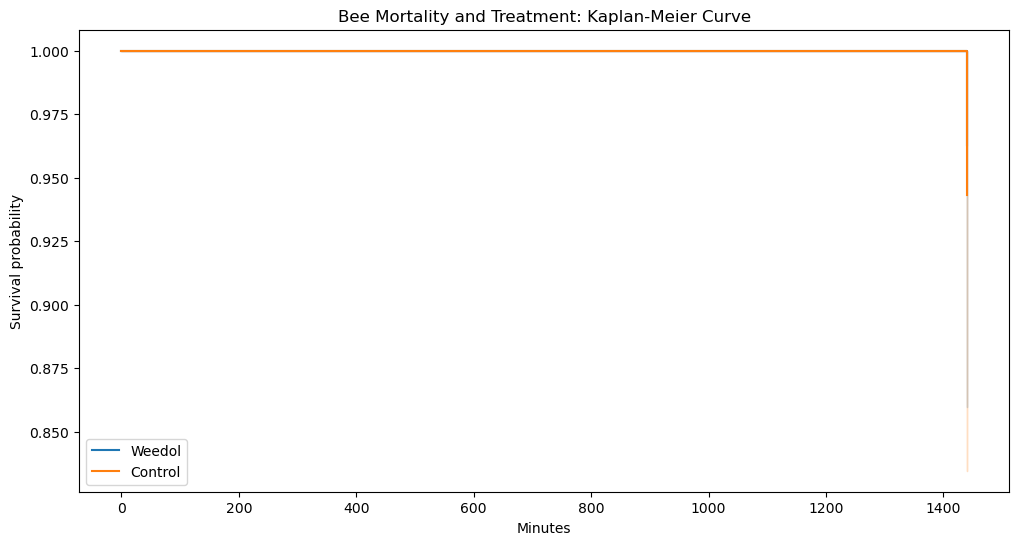

In [27]:
df4a = df4[df4.Treatment=='Weedol']
df4b = df4[df4.Treatment=='Control']
kmf.fit(df4a.Time, df4a.Event)
kmf.plot(label='Weedol', figsize=(12,6))
kmf.fit(df4b.Time, df4b.Event)
kmf.plot(label='Control', figsize=(12,6))
plt.title('Bee Mortality and Treatment: Kaplan-Meier Curve')
plt.xlabel('Minutes')
plt.ylabel('Survival probability')

In [118]:
df_u = df4[['Treatment','Event']]
df_d = pd.get_dummies(df_u, drop_first=True)
df_d['Time'] = df4.Time
df_d.head()

,Event,Treatment_Weedol,Time
0,1.0,0,1440.0
1,0.0,0,1440.0
2,0.0,0,1440.0
3,0.0,0,1440.0
4,0.0,0,1440.0


In [119]:
cph = CoxPHFitter()
cph.fit(df_d, duration_col='Time', event_col='Event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 107 total observations, 102 right-censored observations>
             duration col = 'Time'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 107
number of events observed = 5
   partial log-likelihood = -23.15
         time fit was run = 2023-02-07 01:37:01 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
Treatment_Weedol  -0.43       0.65       0.91            -2.22             1.36                 0.11                 3.88

                   cmp to     z    p   -log2(p)
covariate                                      
Treatment_Weedol     0.00 -0.47 0.64       0.65
---
Concordance = 0.55
Partial AIC = 48.31
log-likelihood ratio test = 0.23 on 1 df
-log2(p) of ll-ratio test = 0.66

<AxesSubplot:xlabel='log(HR) (95% CI)'>

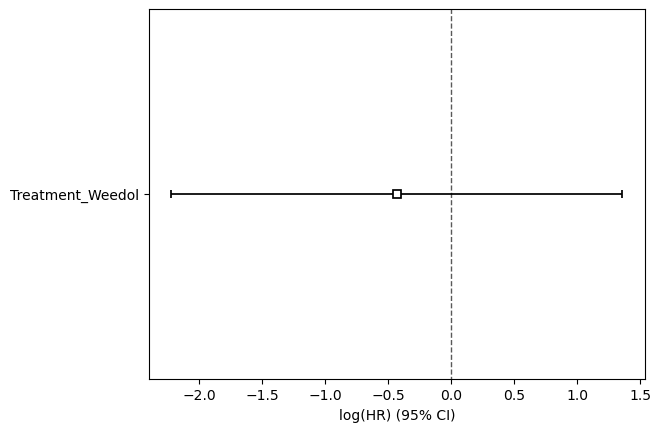

In [120]:
cph.plot()

<AxesSubplot:>

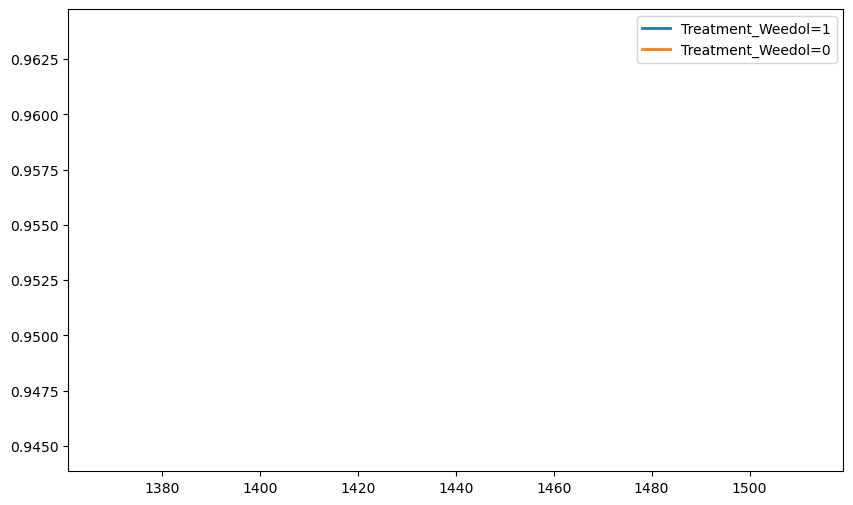

In [122]:
cph.plot_partial_effects_on_outcome(covariates='Treatment_Weedol', values=[1,0], plot_baseline=False, figsize=(10,6), lw=2)

## Dataset 3

In [45]:
df5 = pd.read_excel('Data Exp5.xlsx')

In [46]:
df5.head()

,MicroColony_ID,Treatment,OriginColony_name,Time,Event
0,a,Control,Colony 9,1440.0,0.0
1,a,Control,Colony 9,1440.0,0.0
2,a,Control,Colony 9,1440.0,0.0
3,a,Control,Colony 9,1440.0,0.0
4,a,Control,Colony 9,1440.0,0.0


In [47]:
df5.shape

(99, 5)

In [78]:
df5.isna().sum().sum()

0

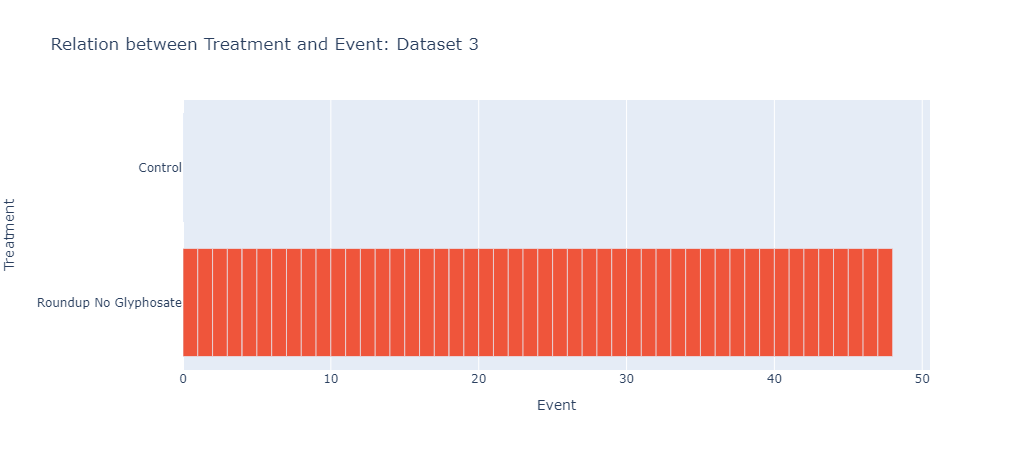

In [67]:
fig = px.bar(df5, x='Event', y='Treatment', color='Treatment' ,title='Relation between Treatment and Event: Dataset 3')
fig.update_layout(showlegend=False)

<AxesSubplot:xlabel='Event', ylabel='Treatment'>

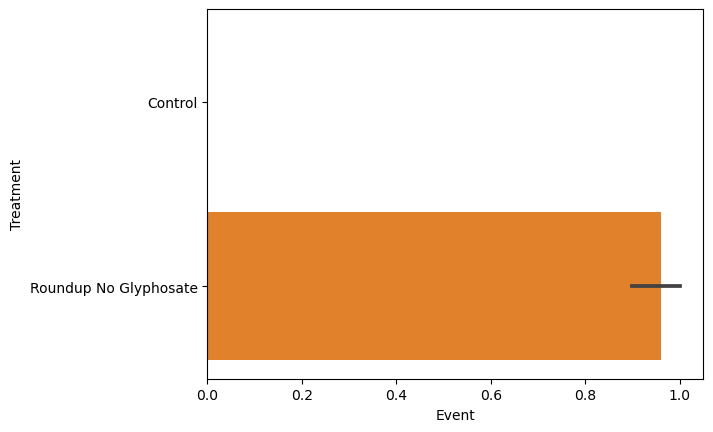

In [33]:
sns.barplot(data=df5, x='Event', y='Treatment')

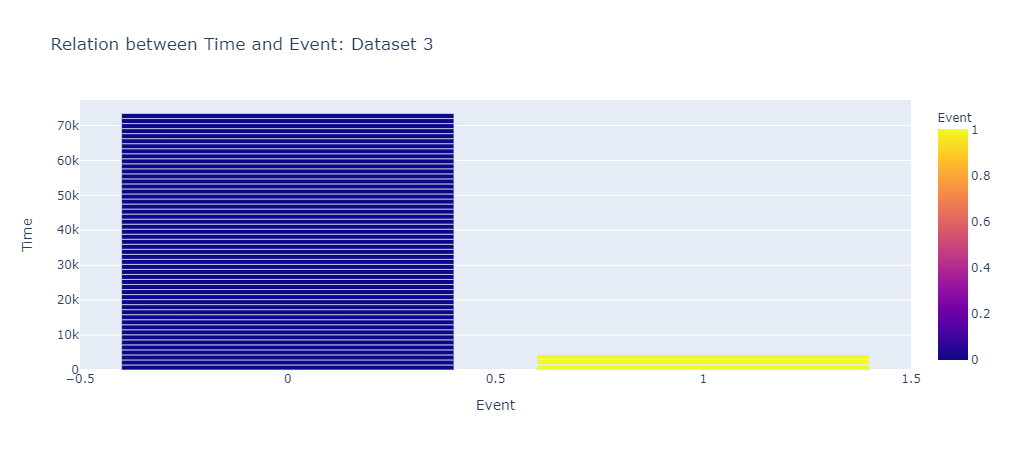

In [72]:
fig = px.bar(df5, x='Event', y='Time', color='Event' ,title='Relation between Time and Event: Dataset 3')
fig.update_layout(showlegend=False)

<AxesSubplot:xlabel='Event', ylabel='Time'>

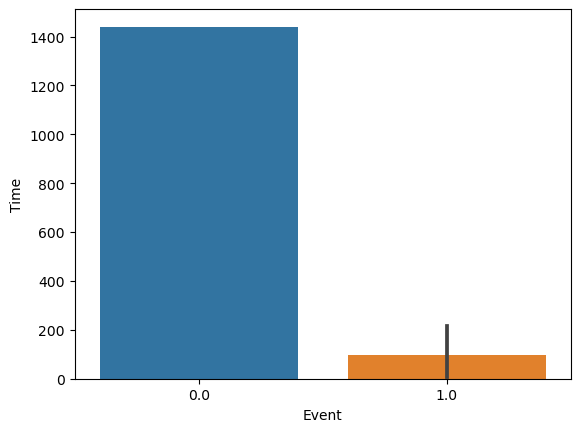

In [34]:
sns.barplot(data=df5, x='Event', y='Time')

Text(0, 0.5, 'Survival probability')

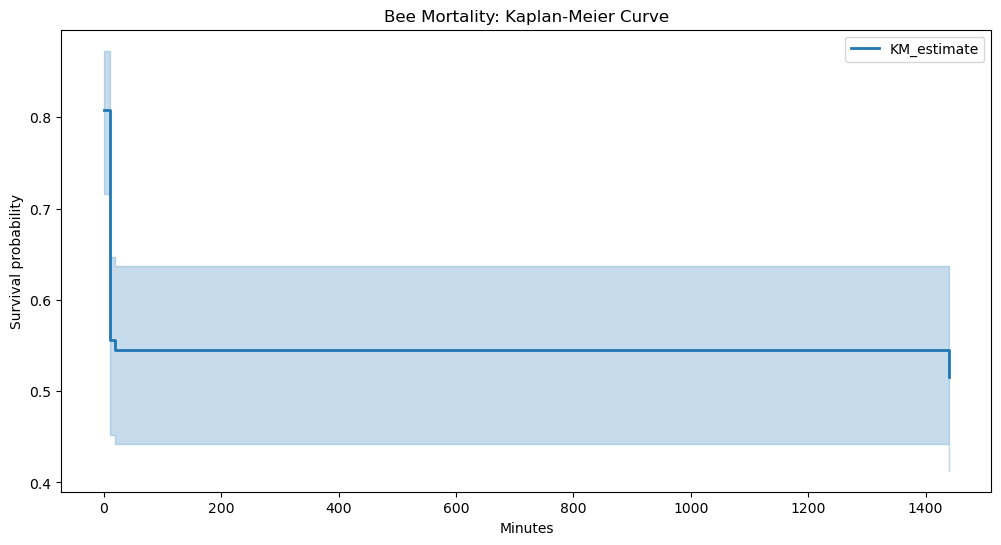

In [35]:
kmf = KaplanMeierFitter()
kmf.fit(df5.Time, df5.Event)
kmf.plot(linewidth=2, figsize=(12,6))
plt.title('Bee Mortality: Kaplan-Meier Curve')
plt.xlabel('Minutes')
plt.ylabel('Survival probability')

Text(0, 0.5, 'Survival probability')

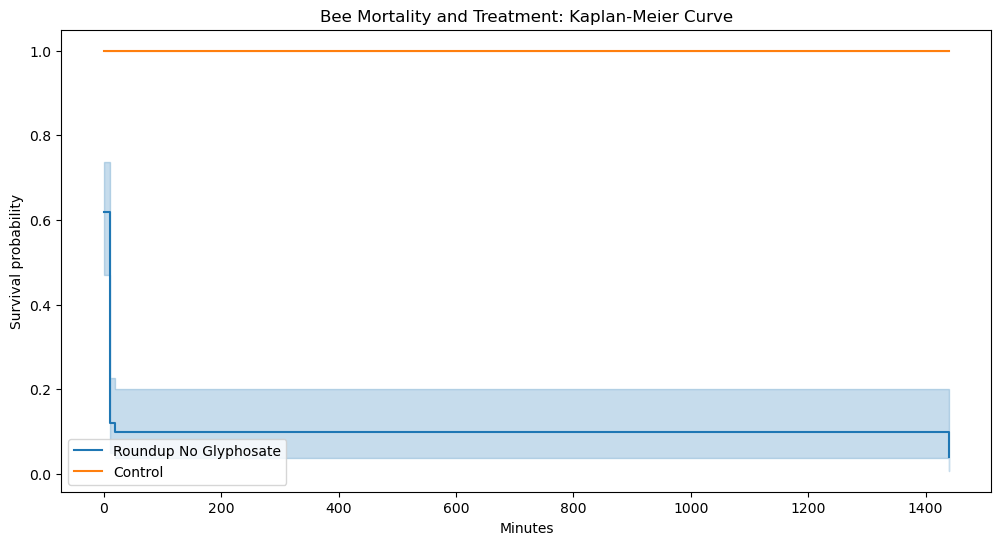

In [36]:
df5a = df5[df5.Treatment=='Roundup No Glyphosate']
df5b = df5[df5.Treatment=='Control']
kmf.fit(df5a.Time, df5a.Event)
kmf.plot(label='Roundup No Glyphosate', figsize=(12,6))
kmf.fit(df5b.Time, df5b.Event)
kmf.plot(label='Control', figsize=(12,6))
plt.title('Bee Mortality and Treatment: Kaplan-Meier Curve')
plt.xlabel('Minutes')
plt.ylabel('Survival probability')

In [163]:
df_u = df5[['Treatment', 'Event']]
df_d = pd.get_dummies(df_u, drop_first=True)
df_d['Time'] = df5.Time
df_d.head()

,Event,Treatment_Roundup No Glyphosate,Time
0,0.0,0,1440.0
1,0.0,0,1440.0
2,0.0,0,1440.0
3,0.0,0,1440.0
4,0.0,0,1440.0


In [178]:
df_c = df_d.loc[df_d['Event'] == 1]
a = df_c['Event'].sum()
print('Number of death events in dataset 3:', a)
b = df_c['Treatment_Roundup No Glyphosate'].sum()
print('Death events due to Roundup No Glyphosate:', b)

Number of death events in dataset 3: 48.0
Death events due to Roundup No Glyphosate: 48


In [183]:
cph = CoxPHFitter(penalizer=0.001)
cph.fit(df_d, duration_col='Time', event_col='Event')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 99 total observations, 51 right-censored observations>
             duration col = 'Time'
                event col = 'Event'
                penalizer = 0.001
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 99
number of events observed = 48
   partial log-likelihood = -148.53
         time fit was run = 2023-02-07 03:39:53 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
Treatment_Roundup No Glyphosate   6.76     863.33       2.28             2.30            11.22                 9.95             74898.90

                                  cmp to    z      p   -log2(p)
covariate                                                      
Treatment_Roundup No Glyphosate     0.00 2.97 <0.005       8.39
---
Concordance = 0.88
Partial AIC = 299.05
log-likelihood ratio test = 116.40 on 1 df
-log2(p) of ll-ratio test = 87.73

In [184]:
events = df_d['Event'].astype(bool)
print(df_d.loc[events, 'Treatment_Roundup No Glyphosate'].var())
print(df_d.loc[~events, 'Treatment_Roundup No Glyphosate'].var())

0.0
0.038431372549019606


<AxesSubplot:xlabel='log(HR) (95% CI)'>

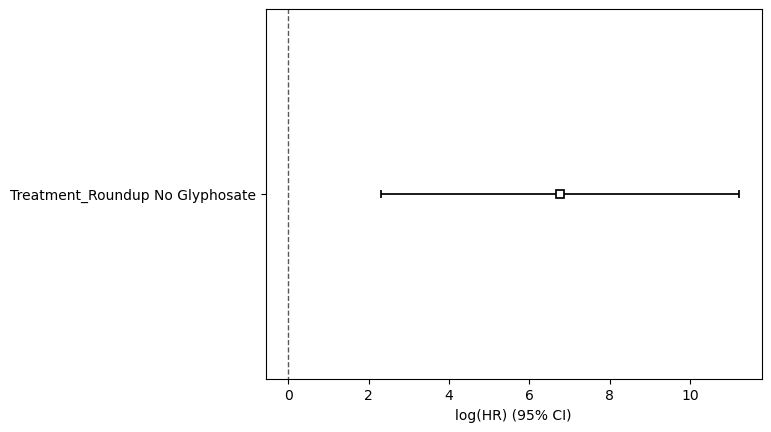

In [185]:
cph.plot()

<AxesSubplot:>

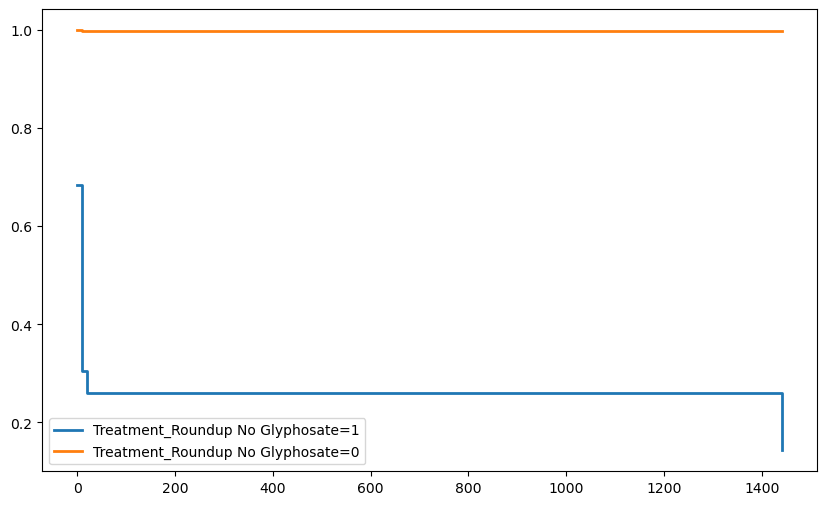

In [159]:
cph.plot_partial_effects_on_outcome(covariates='Treatment_Roundup No Glyphosate', values=[1,0], plot_baseline=False, figsize=(10,6), lw=2)

In [79]:
cph.check_assumptions(df_d, p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]